In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
%matplotlib inline

plt.style.use('seaborn-whitegrid')
sns.set_palette("colorblind")

In [72]:
in_filename = './sample data/SYNTHETIC/synthetic_comprisk.csv'
df = pd.read_csv(in_filename, sep=',')
df = pd.read_csv('./sample data/SYNTHETIC/synthetic_comprisk.csv', sep=',')

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic dataset information
print("\nDataset shape:", df.shape)
print("\nData types:")
display(df.dtypes)

# Basic statistics
print("\nBasic statistics:")
display(df.describe())

# Basic dataset information
print(f"Dataset shape: {df.shape}")
print(f"Event distribution:\n{df['label'].value_counts()}")

First 5 rows of the dataset:


,time,label,true_time,true_label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
0,0,0,0,1,-0.440500,-0.035066,-0.025341,-0.029775,-0.55787,-0.15355,0.56819,-0.15432,-0.250230,0.33915,0.70388,0.28174
1,1,0,1,1,0.015579,-0.846080,0.487530,0.651930,0.20099,-0.11238,-1.39630,-0.18874,-0.300010,-0.24032,-0.38533,-1.02450
2,34,2,34,2,0.446490,1.641000,-1.745000,0.317950,-1.14060,0.36560,0.28110,-0.58253,-1.690700,1.20220,-0.51920,1.78400
3,9,0,9,2,0.629460,-0.615750,-0.323450,-0.900200,0.45360,-0.61992,2.16240,0.19875,-1.119600,-2.73210,-0.25673,-0.81836
4,2,0,10,2,1.249800,-0.185610,-0.183780,-0.981080,-0.01499,-0.14437,-1.25290,-0.58432,-0.090523,0.93692,1.07490,0.79117



Dataset shape: (30000, 16)

Data types:


time            int64
label           int64
true_time       int64
true_label      int64
feature1      float64
feature2      float64
feature3      float64
feature4      float64
feature5      float64
feature6      float64
feature7      float64
feature8      float64
feature9      float64
feature10     float64
feature11     float64
feature12     float64
dtype: object


Basic statistics:


,time,label,true_time,true_label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,16.791367,0.746667,22.282833,1.494967,0.003803,-0.000257,-0.006491,0.004149,0.046499,0.011048,0.052573,0.091576,0.047725,0.069656,0.096401,0.044782
std,24.953185,0.826143,28.981598,0.499983,1.001323,1.005796,0.945128,0.921524,0.995160,0.998349,0.985546,0.972627,0.994084,0.986028,0.972339,0.997762
min,0.000000,0.000000,0.000000,1.000000,-4.239700,-4.245700,-4.455500,-3.797700,-3.754500,-4.460600,-3.962500,-3.655700,-4.057900,-3.887100,-3.885300,-3.784400
25%,2.000000,0.000000,3.000000,1.000000,-0.680760,-0.685787,-0.661630,-0.640918,-0.622378,-0.660465,-0.614467,-0.565348,-0.625745,-0.595052,-0.559725,-0.626518
50%,7.000000,0.500000,11.000000,1.000000,-0.000615,0.004402,-0.009261,-0.003663,0.039998,0.009138,0.054819,0.094075,0.056466,0.066806,0.099735,0.046685
75%,21.000000,1.000000,30.000000,2.000000,0.681135,0.683995,0.641888,0.642073,0.714255,0.675200,0.717393,0.753437,0.721915,0.738300,0.747290,0.715215
max,192.000000,2.000000,197.000000,2.000000,3.654700,4.000800,3.611800,3.513400,4.301900,3.851800,3.918300,4.031800,4.033700,3.900400,4.250000,4.079600


Dataset shape: (30000, 16)
Event distribution:
0    15000
1     7600
2     7400
Name: label, dtype: int64


In [73]:
df.describe()

,time,label,true_time,true_label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,16.791367,0.746667,22.282833,1.494967,0.003803,-0.000257,-0.006491,0.004149,0.046499,0.011048,0.052573,0.091576,0.047725,0.069656,0.096401,0.044782
std,24.953185,0.826143,28.981598,0.499983,1.001323,1.005796,0.945128,0.921524,0.995160,0.998349,0.985546,0.972627,0.994084,0.986028,0.972339,0.997762
min,0.000000,0.000000,0.000000,1.000000,-4.239700,-4.245700,-4.455500,-3.797700,-3.754500,-4.460600,-3.962500,-3.655700,-4.057900,-3.887100,-3.885300,-3.784400
25%,2.000000,0.000000,3.000000,1.000000,-0.680760,-0.685787,-0.661630,-0.640918,-0.622378,-0.660465,-0.614467,-0.565348,-0.625745,-0.595052,-0.559725,-0.626518
50%,7.000000,0.500000,11.000000,1.000000,-0.000615,0.004402,-0.009261,-0.003663,0.039998,0.009138,0.054819,0.094075,0.056466,0.066806,0.099735,0.046685
75%,21.000000,1.000000,30.000000,2.000000,0.681135,0.683995,0.641888,0.642073,0.714255,0.675200,0.717393,0.753437,0.721915,0.738300,0.747290,0.715215
max,192.000000,2.000000,197.000000,2.000000,3.654700,4.000800,3.611800,3.513400,4.301900,3.851800,3.918300,4.031800,4.033700,3.900400,4.250000,4.079600


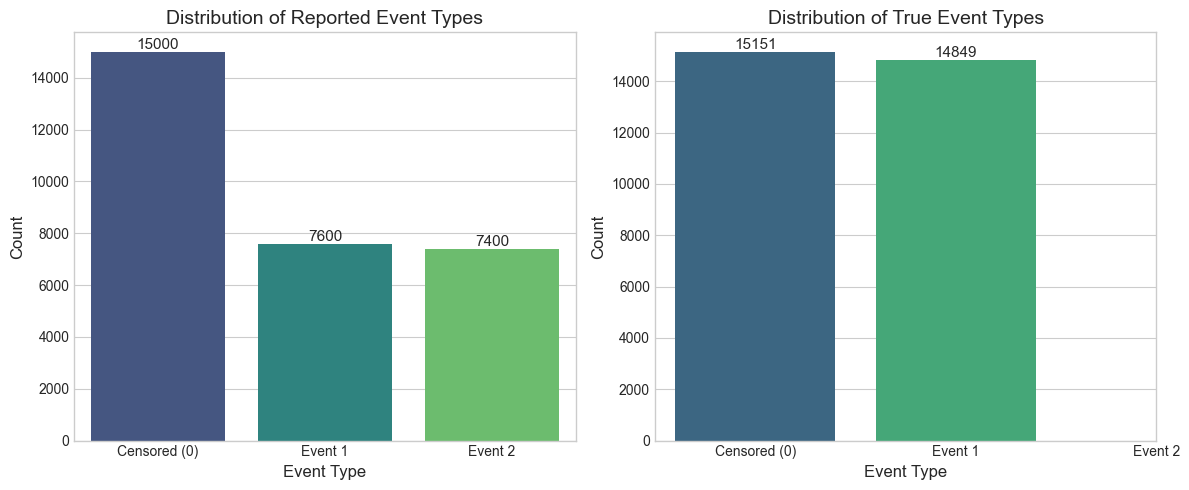

In [74]:
# Understanding the event distribution
plt.figure(figsize=(12, 5))

# Compare reported vs true labels
plt.subplot(1, 2, 1)
event_counts = df['label'].value_counts().sort_index()
ax1 = sns.barplot(x=event_counts.index, y=event_counts.values, palette='viridis')
plt.title('Distribution of Reported Event Types', fontsize=14)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['Censored (0)', 'Event 1', 'Event 2'])

# Add count labels on top of bars
for i, p in enumerate(ax1.patches):
    ax1.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.subplot(1, 2, 2)
true_event_counts = df['true_label'].value_counts().sort_index()
ax2 = sns.barplot(x=true_event_counts.index, y=true_event_counts.values, palette='viridis')
plt.title('Distribution of True Event Types', fontsize=14)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1, 2], ['Censored (0)', 'Event 1', 'Event 2'])

# Add count labels on top of bars
for i, p in enumerate(ax2.patches):
    ax2.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

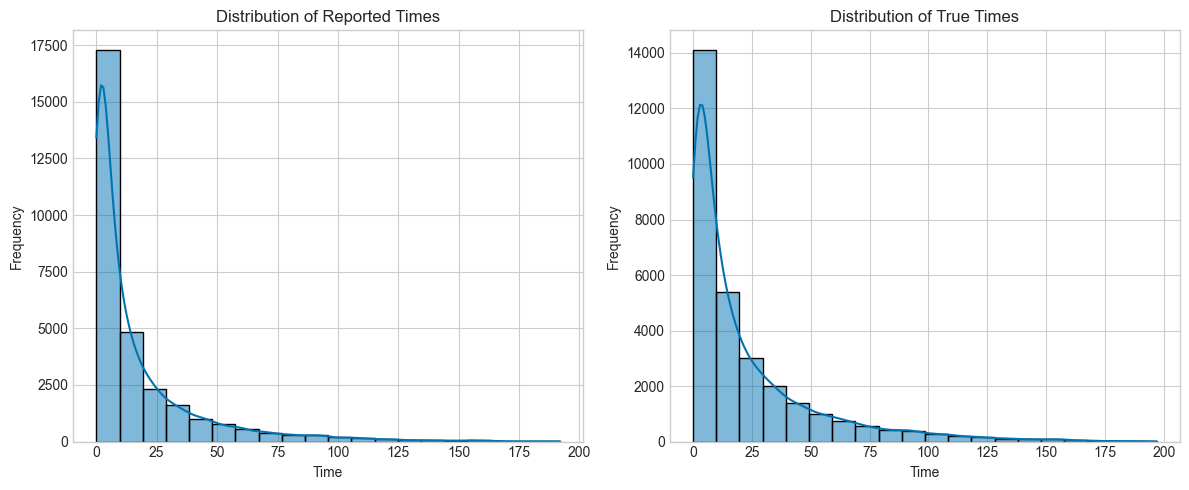

In [75]:
# Analyze time distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['time'], bins=20, kde=True)
plt.title('Distribution of Reported Times')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['true_time'], bins=20, kde=True)
plt.title('Distribution of True Times')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

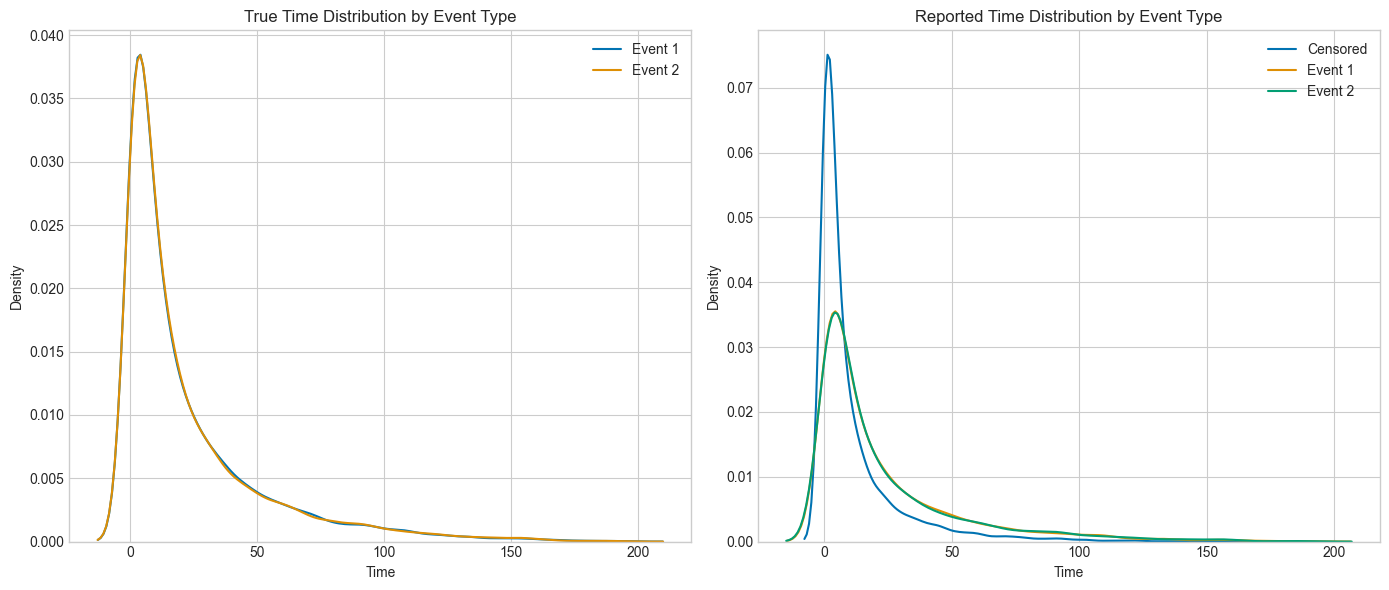

In [76]:
# Compare time distributions by event type
plt.figure(figsize=(14, 6))

# For true labels
plt.subplot(1, 2, 1)
for event in sorted(df['true_label'].unique()):
    subset = df[df['true_label'] == event]
    sns.kdeplot(subset['true_time'], label=f'Event {event}' if event > 0 else 'Censored')
plt.title('True Time Distribution by Event Type')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

# For reported labels
plt.subplot(1, 2, 2)
for event in sorted(df['label'].unique()):
    subset = df[df['label'] == event]
    sns.kdeplot(subset['time'], label=f'Event {event}' if event > 0 else 'Censored')
plt.title('Reported Time Distribution by Event Type')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

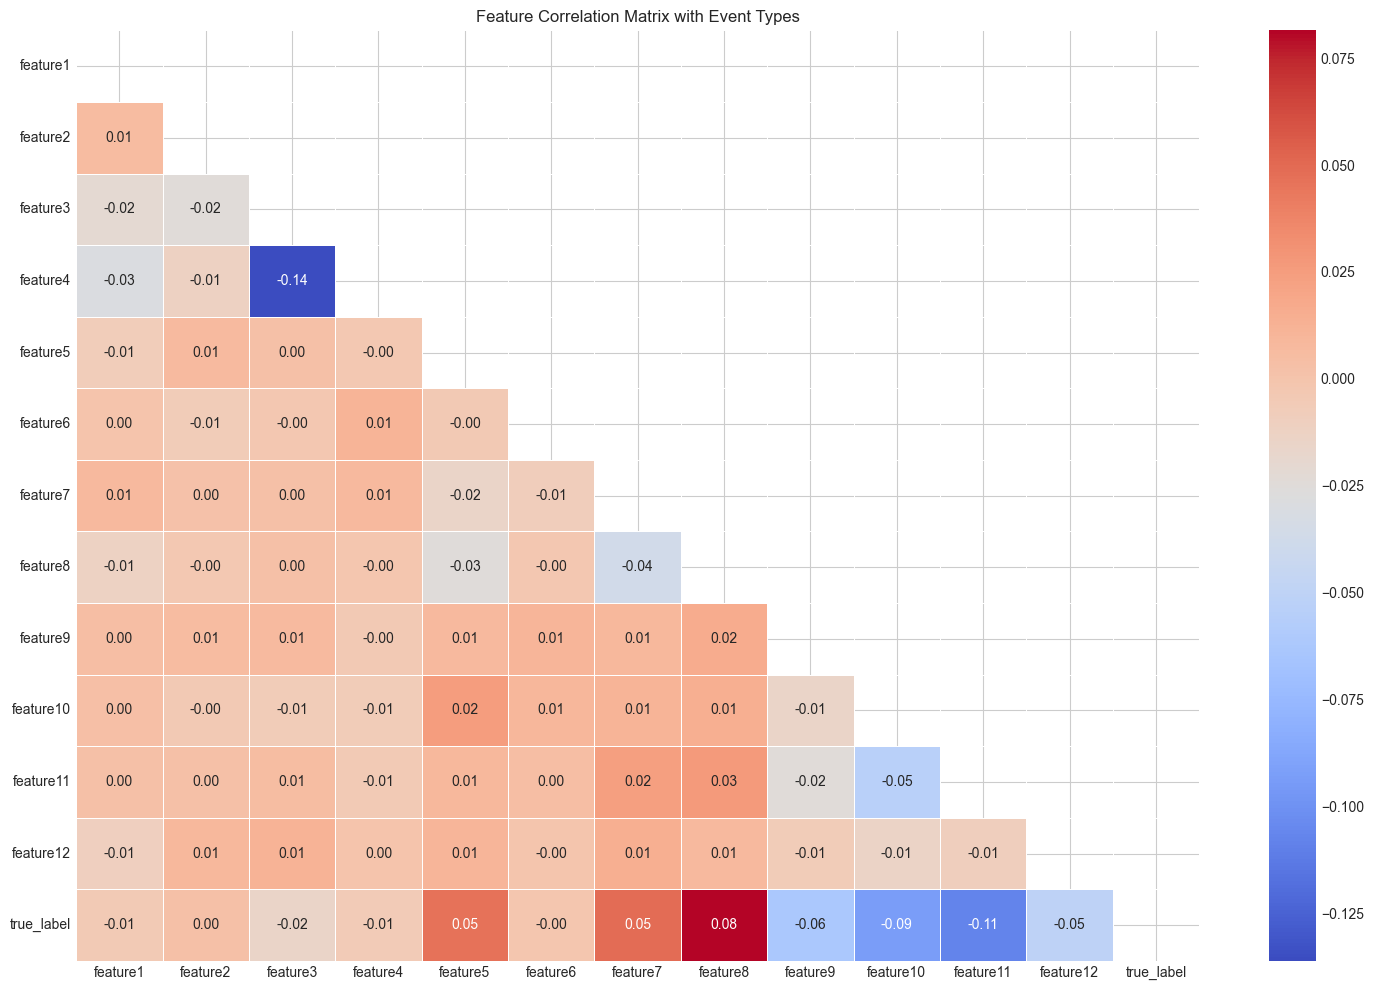

In [77]:
# Analyze feature importance through heatmap
feature_cols = [col for col in df.columns if 'feature' in col]

# Correlation of features with event types
plt.figure(figsize=(15, 10))
corr_matrix = df[feature_cols + ['true_label']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix with Event Types')
plt.tight_layout()
plt.show()

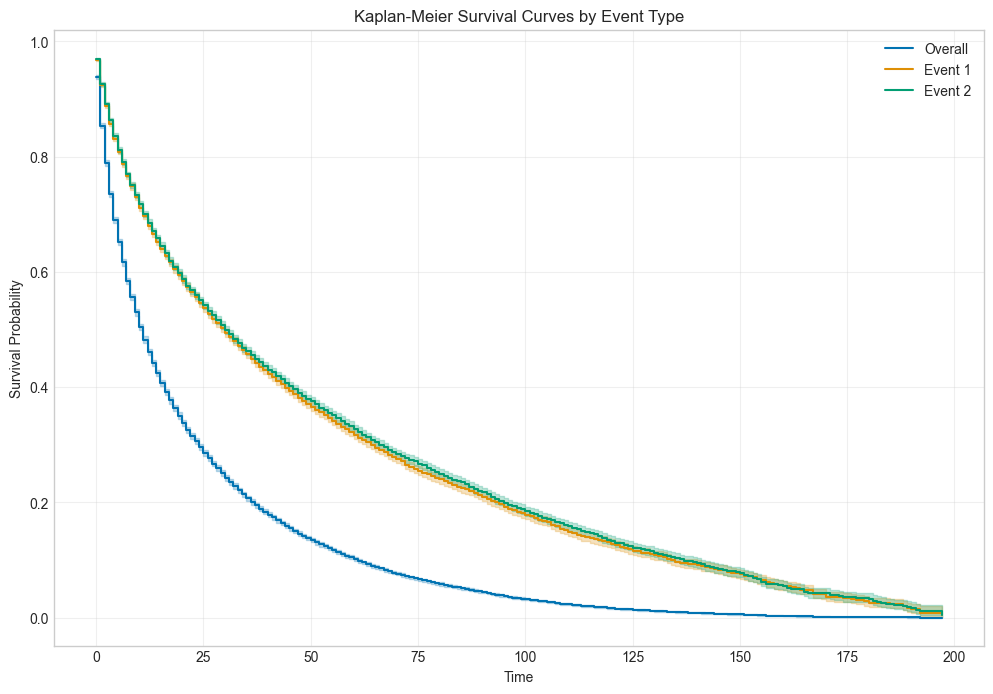

In [78]:
# Create Kaplan-Meier survival curves for competing risks
plt.figure(figsize=(12, 8))

# For all events combined
kmf_all = KaplanMeierFitter()
event_observed = (df['true_label'] > 0).astype(int)
kmf_all.fit(df['true_time'], event_observed=event_observed, label='Overall')
kmf_all.plot_survival_function(ax=plt.gca())

# For Event Type 1
kmf_event1 = KaplanMeierFitter()
df_event1 = df.copy()
df_event1['event_observed'] = (df_event1['true_label'] == 1).astype(int)
kmf_event1.fit(df_event1['true_time'], event_observed=df_event1['event_observed'], label='Event 1')
kmf_event1.plot_survival_function(ax=plt.gca())

# For Event Type 2
kmf_event2 = KaplanMeierFitter()
df_event2 = df.copy()
df_event2['event_observed'] = (df_event2['true_label'] == 2).astype(int)
kmf_event2.fit(df_event2['true_time'], event_observed=df_event2['event_observed'], label='Event 2')
kmf_event2.plot_survival_function(ax=plt.gca())

plt.title('Kaplan-Meier Survival Curves by Event Type')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

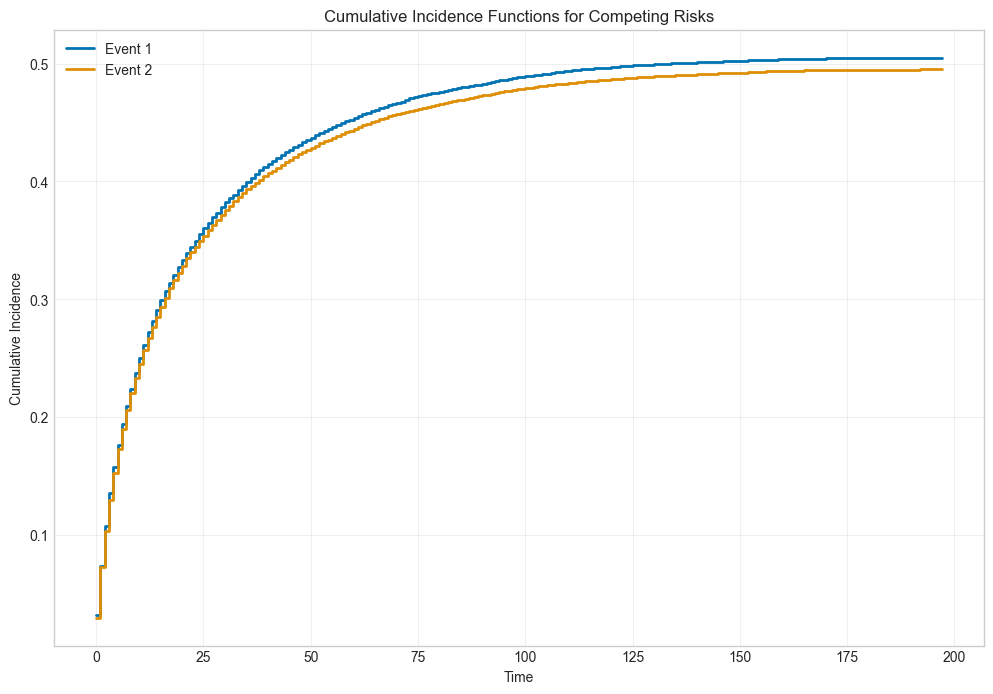

In [79]:
# Cumulative Incidence Functions (CIF) for competing risks
def compute_cif(df, time_col, event_col, event_value):
    """Compute the Cumulative Incidence Function for a specific event"""
    # Sort by time
    df_sorted = df.sort_values(by=time_col)
    # Get unique times and count events at each time
    unique_times = df_sorted[time_col].unique()
    cif_values = []
    
    n_samples = len(df)
    cumulative_events = 0
    
    for t in unique_times:
        # Count events of this type at this time
        events_at_t = sum((df_sorted[time_col] == t) & (df_sorted[event_col] == event_value))
        cumulative_events += events_at_t
        cif_values.append(cumulative_events / n_samples)
    
    return unique_times, cif_values

plt.figure(figsize=(12, 8))

# CIF for Event 1
times1, cif1 = compute_cif(df, 'true_time', 'true_label', 1)
plt.step(times1, cif1, where='post', label='Event 1', linewidth=2)

# CIF for Event 2
times2, cif2 = compute_cif(df, 'true_time', 'true_label', 2)
plt.step(times2, cif2, where='post', label='Event 2', linewidth=2)

plt.title('Cumulative Incidence Functions for Competing Risks')
plt.xlabel('Time')
plt.ylabel('Cumulative Incidence')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

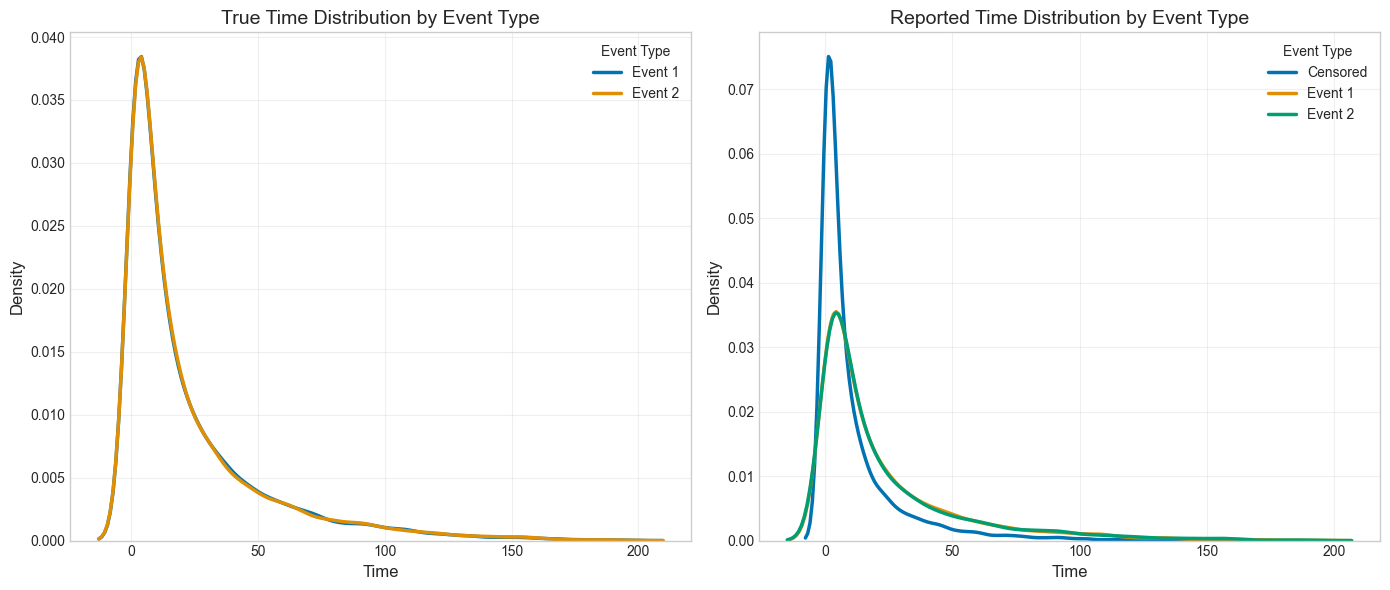

In [80]:
# Analyze time distributions by event type
plt.figure(figsize=(14, 6))

# For true time and true labels
plt.subplot(1, 2, 1)
for event in sorted(df['true_label'].unique()):
    subset = df[df['true_label'] == event]
    label = f'Event {event}' if event > 0 else 'Censored'
    sns.kdeplot(subset['true_time'], label=label, linewidth=2.5)
plt.title('True Time Distribution by Event Type', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Event Type')
plt.grid(alpha=0.3)

# For reported time and reported labels
plt.subplot(1, 2, 2)
for event in sorted(df['label'].unique()):
    subset = df[df['label'] == event]
    label = f'Event {event}' if event > 0 else 'Censored'
    sns.kdeplot(subset['time'], label=label, linewidth=2.5)
plt.title('Reported Time Distribution by Event Type', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Event Type')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()